In [34]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from matplotlib.animation import FuncAnimation, ArtistAnimation
#from rydbperc.cython_utilities import util
from rydbperc2 import ryperc2
import numpy as np

density =  0.003125
7


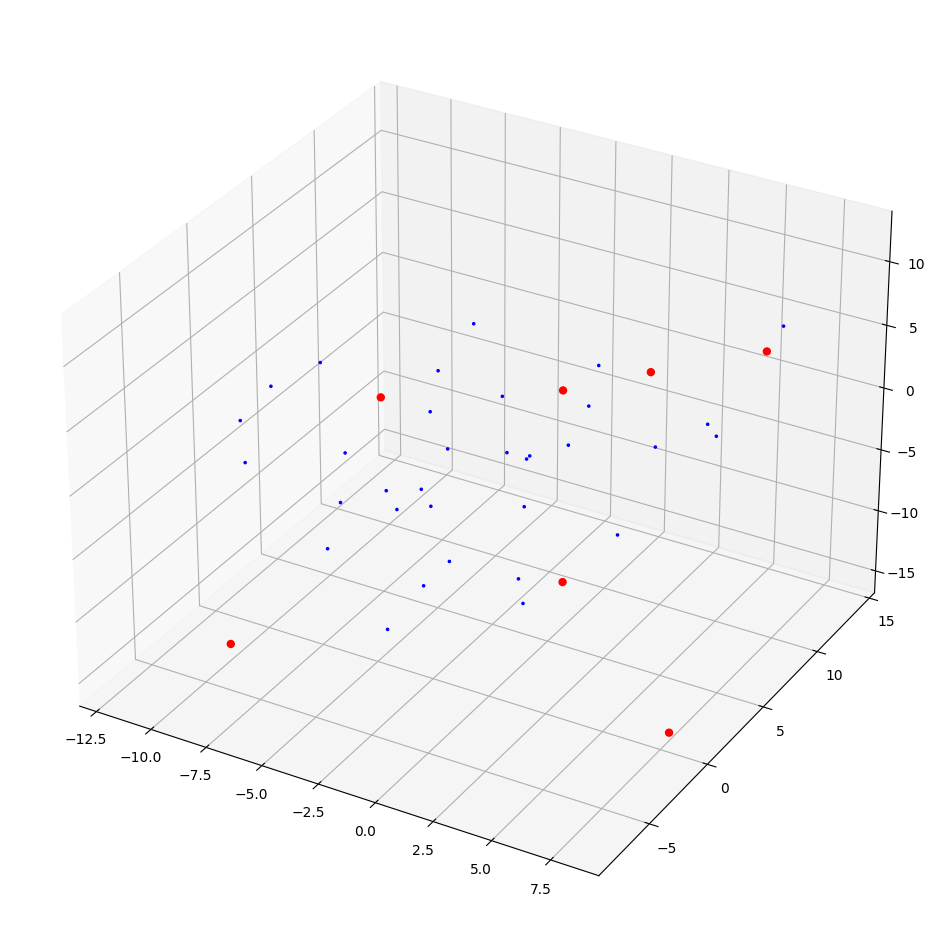

In [35]:
N_points = 40
radius_MOT = 5

C6 = 1.2*10**6 # van der waals coefficient [MHz * um^6]
gamma_def = 0.7 # dephasing rate [MHz]
Delta = 0 # detuning [MHz]
gamma_spontaneous_emission_70s = 0.1 # [MHz]
two_ph_rabi_freq = 200 # MHz

shape = [80,80,200]
density = N_points/(shape[0]*shape[1]*shape[2]*10**-2) # atoms/cm^3

print("density = ",density)

clu = ryperc2.cluster3D(N_points, shape, distribution="gaussian", MOT_radius=radius_MOT, is_2D=False)

clu.set_evolution_parameters(
                            rabi_frequency = two_ph_rabi_freq,
                            dephasing = gamma_def, 
                            detuning = Delta,
                            vdw_C6 = C6, 
                            spontaneous_emission_rate = gamma_spontaneous_emission_70s
                            )

steps = 10000
clu.evolve(1, excitation_steps=steps, steps=steps)
print(len(clu.cluster_excited))
clu.show()

In [36]:
MOT_expantion = np.linspace(5, 18, 10)
reps = 10

n_exc_tot = []
n_exc_std = []
for radius_MOT in MOT_expantion:
    n_exc = []
    for _ in range(reps):
        clu = ryperc2.cluster3D(N_points, shape, distribution="gaussian", MOT_radius=radius_MOT, is_2D=False)

        clu.set_evolution_parameters(
                                    rabi_frequency = two_ph_rabi_freq,
                                    dephasing = gamma_def, 
                                    detuning = Delta,
                                    vdw_C6 = C6, 
                                    spontaneous_emission_rate = gamma_spontaneous_emission_70s
                                    )

        steps = 1000
        clu.evolve(1, excitation_steps=steps, steps=steps)
        n_exc.append(len(clu.cluster_excited))

    n_exc_tot.append(np.mean(n_exc))
    n_exc_std.append(np.std(n_exc))

    clear_output(wait=True)
    print("status: %.1f" %(100*(radius_MOT-min(MOT_expantion))/(max(MOT_expantion)-min(MOT_expantion))))
    #clu.show()

status: 100.0


In [37]:
clu.blockade_radius

10.93991298492429

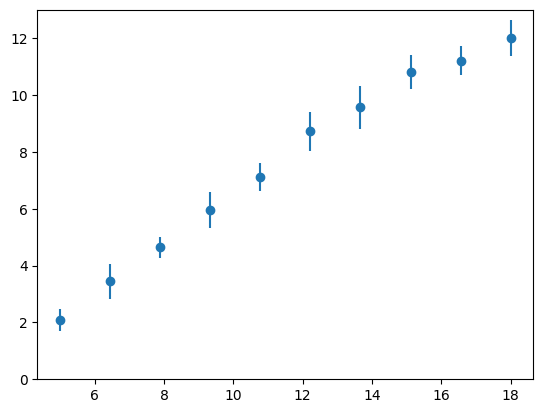

In [38]:
y = np.array(n_exc_tot)*0.4
dy = np.array(n_exc_std)*0.4
plt.errorbar(MOT_expantion, y, dy, marker="o", linestyle="")
plt.ylim([0,max(y)+1])
plt.show()